**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical inversion of ratio (Broda-Kan Approach)</font>

# <font color = brown>Ratio of independent RVs - Examples
</font>

<font size=5> Computational tools: </font>  **<font size=5>MATLAB (Own code)</font>**  

code `cf_Ratio_BK.m` 

---


**Section 3.2:** Inversion formula for ratio $T$ of independent RVs $X_1,X_2$
$$
f_T(x) = \frac{1}{\pi^2} \int_0^{+\infty} \int_{-\infty}^{+\infty} \Re\left\{\frac{\varphi_{X_1}(t_1)}{t_2} \varphi_{X_2}^{\prime}(-t_2 - x t_1)\right\} d t_1 d t_2.
$$

**Ref.** Hanč J., Hančová M., Borovský D., Probability distributions and calculations for Hake’s ratio statistics in measuring effect size, 
*preprint submitted to Statistical Papers*

# EXAMPLE 1: Hake ratio

For ratio of independent normal variables:  $T = X_1/X_2$

Numerator $ X_1 \sim N(a, 1), a = 1.5 $:
- CF: $ \varphi_{X_1}(t) = e^{i a t - \frac{t^2}{2}}$

Denominator $ X_2 \sim N(b, 1) $, $ b = 1 $\:
- CF: $ \varphi_{X_2}(t) = e^{i b t - \frac{t^2}{2}}$


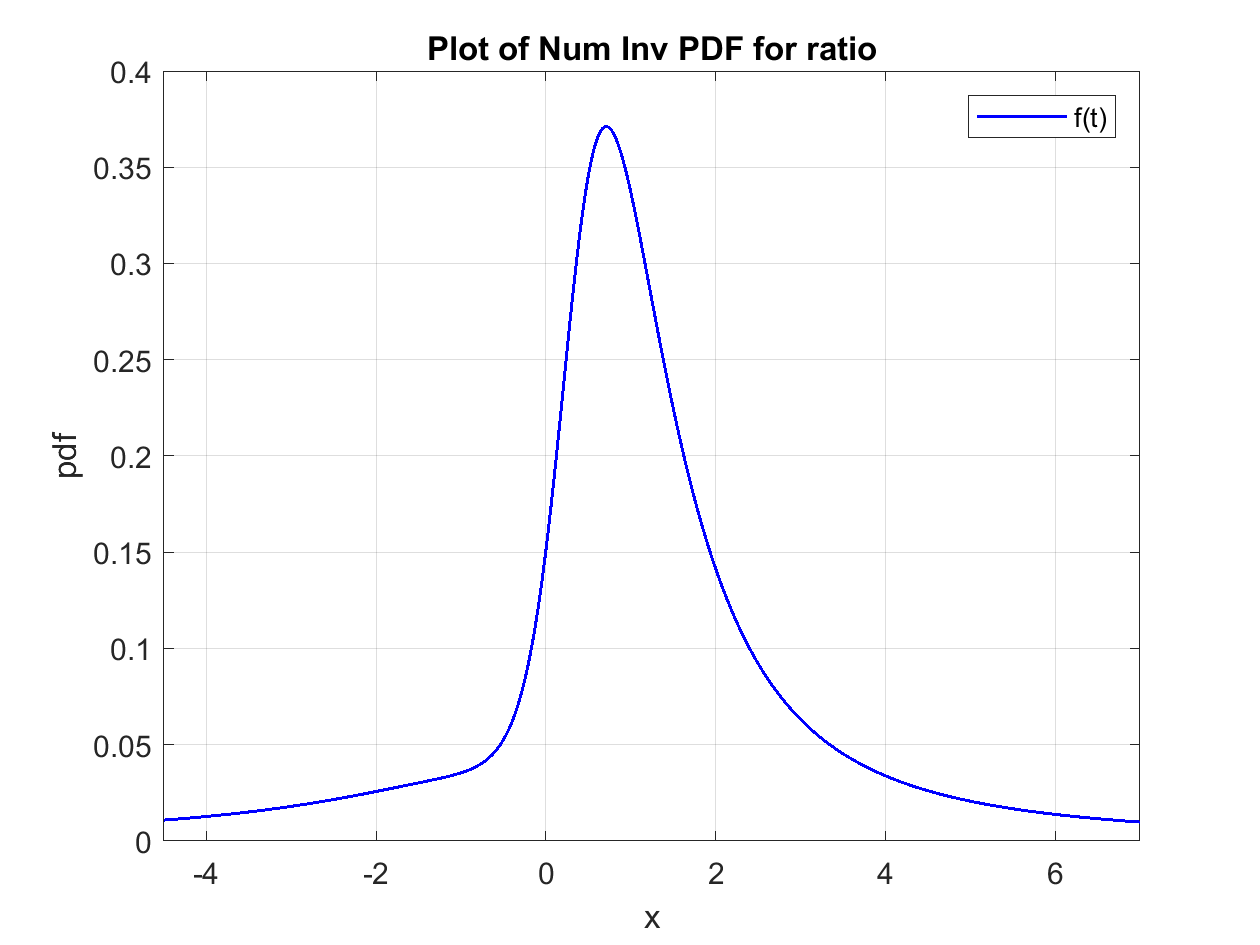

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
                  xN: 1000
                   x: [1000x1 double]
                 pdf: [1000x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.1745]
                   T: 0.0873
               xMean: [1.5000 1]
                xStd: [1.0000 1.0000]
                xMin: [-4.5000 -5.0000]
                xMax: [7 7.0000]
             options: [1x1 struct]
             runtime: 0.7618
      runtimePerCalc: 7.6179e-04



In [3]:
% characteristic function of X1 ~ N(a,1)
a = 1.5;
cfX1 = @(t1) exp(1i * a * t1 - t1.^2 / 2);

% characteristic function of X2 ~ N(b,1)
b = 1;
cfX2 = @(t2) exp(1i * b* t2 - t2.^2 / 2);

% 1000 points in a default six sigma interval for X1
clear options;
options.isPlot = true;
x = linspace(-4.5, 7, 1000);
% num inversion of ratio
[resultH, Rpdf] = cf_Ratio_BK(cfX1, cfX2, x, options);
disp(resultH)

### Cross-check with existing `cf_Ratio.m` function in CharFunTool
The characteristic function of a ratio of two independent (continuous)
random variables, i.e. $T = X1 / X2$. The distribution of the first random
variable X1 is given by its characteristic function (CF), say cf_X1(t),
and the distribution of the second random variable is given by its
probability density function (PDF), say pdf_X2(x). 

**Formula** Characteristic function for ratio $ T = \frac{X_1}{X_2} $ of independent RVs $ X_1, X_2 $ 
$$
\phi_T(t) = \int_a^b \phi_{X_1}\left( \frac{t}{x} \right) f_{X_2}(x) \, dx.
$$
arising by integrating the scaled characteristic function of $ X_1$ over the probability density of $ X_2 $, leveraging independence and scaling properties.

Combining it with Gil the Gil-Pelaez inversion formula, we have the PDF of the ratio $T$

$$
f_T(x) = \frac{1}{\pi} \int_0^{+\infty} \Re \left\{ e^{-it_1 x} \int_{-\infty}^{+\infty} \varphi_{X_1} \left( \frac{t_1}{t_2} \right) f_{X_2}(t_2) \, dt_2 \right\} dt_1.
$$

https://github.com/witkovsky/CharFunTool  
(c) 2018 Viktor Witkovsky (witkovsky@gmail.com)  
Ver.: 13-Feb-2018 09:10:33 

pdfX2 = function_handle with value:
    @(x)normpdf(x,b,1)

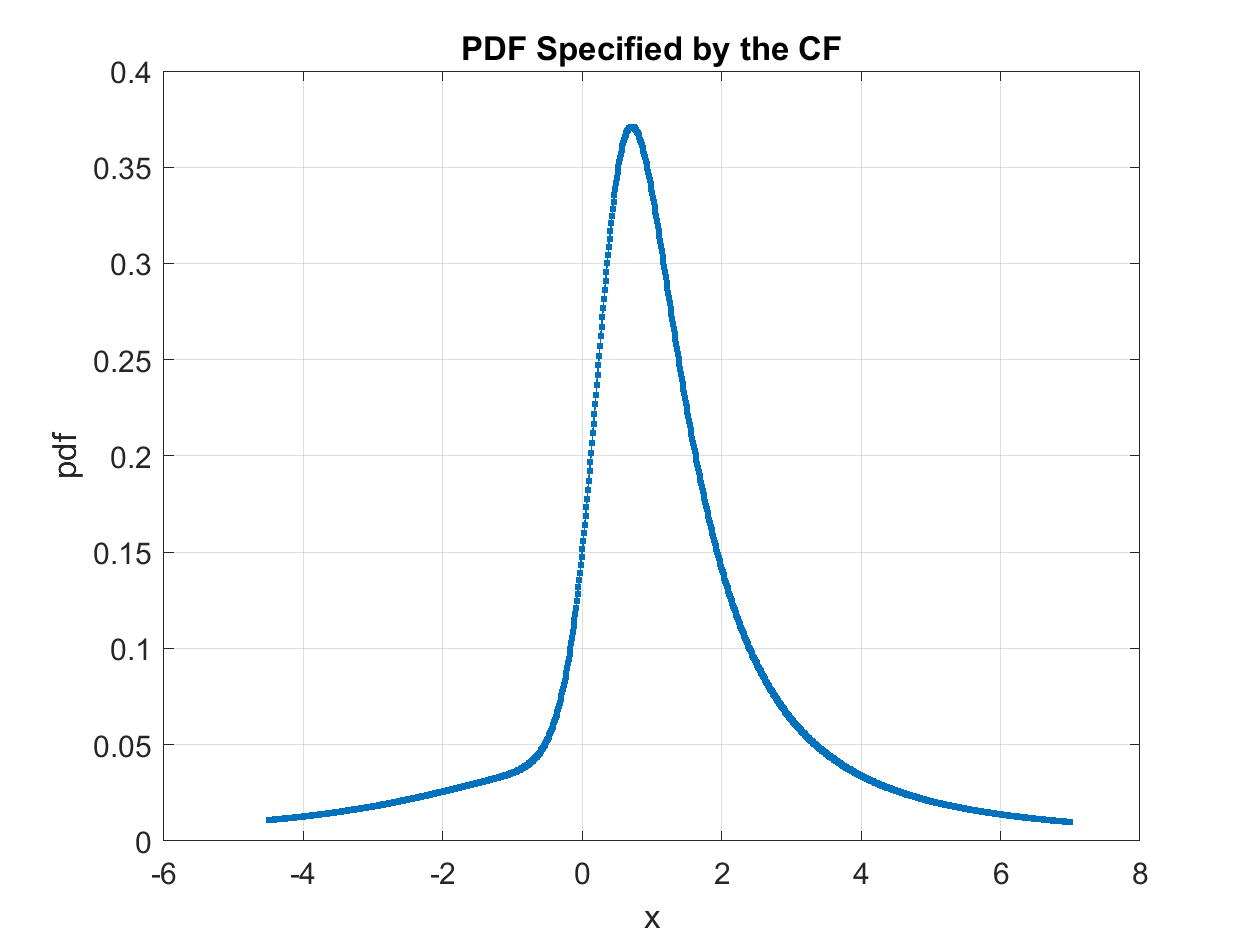

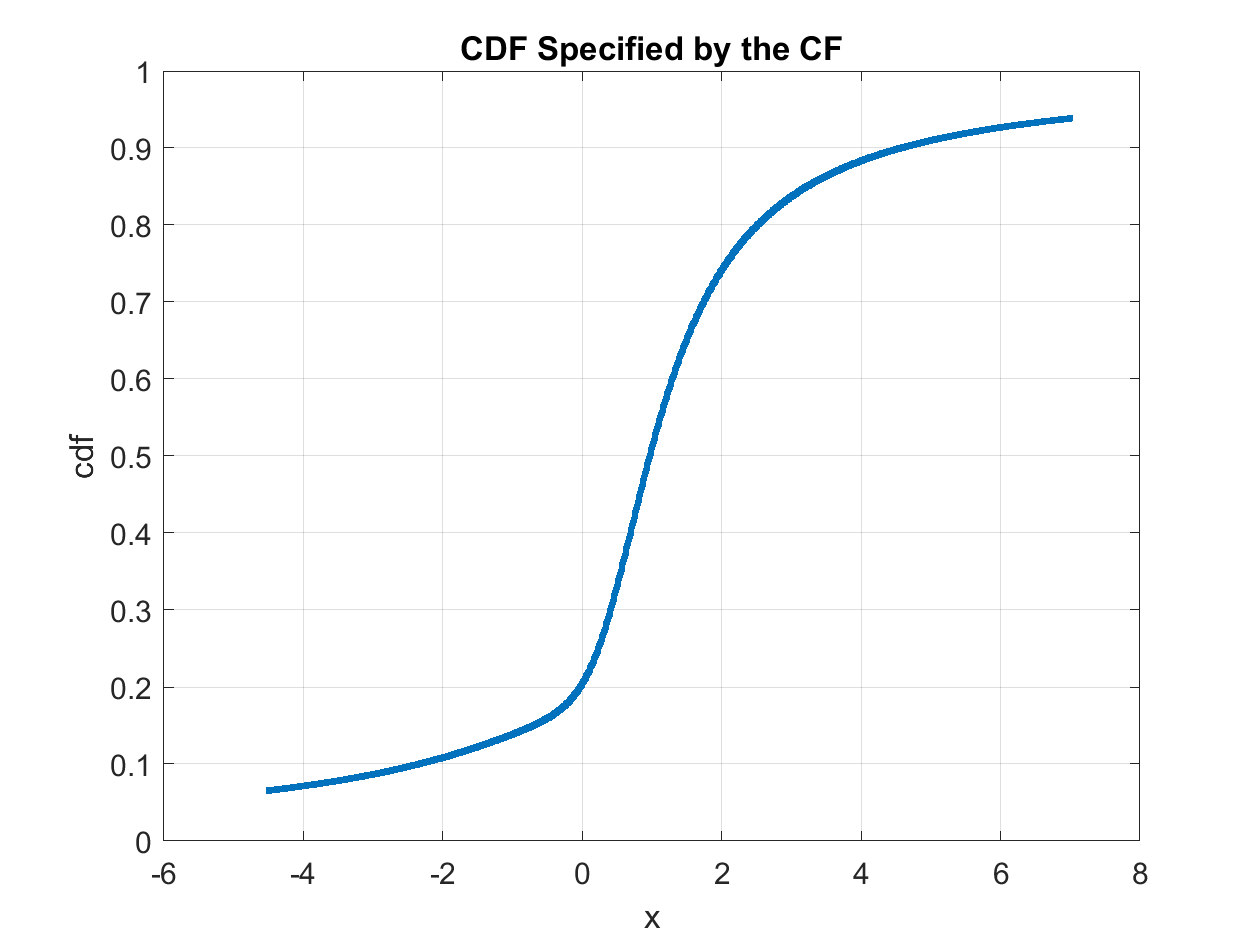

            Description: 'CDF/PDF/QF from the characteristic function CF'
        inversionMethod: 'Gil-Pelaez'
       quadratureMethod: 'Riemann sum quadrature'
                      x: [-4.5000 -4.4885 -4.4770 -4.4655 -4.4540 -4.4424 -4.4309 -4.4194 -4.4079 -4.3964 -4.3849 -4.3734 -4.3619 -4.3504 -4.3388 ... ] (1x1000 double)
                    cdf: [0.0655 0.0657 0.0658 0.0659 0.0661 0.0662 0.0663 0.0664 0.0666 0.0667 0.0668 0.0670 0.0671 0.0672 0.0673 0.0675 0.0676 0.0677 ... ] (1x1000 double)
                    pdf: [0.0109 0.0109 0.0109 0.0110 0.0110 0.0111 0.0111 0.0111 0.0112 0.0112 0.0113 0.0113 0.0113 0.0114 0.0114 0.0115 0.0115 0.0116 ... ] (1x1000 double)
                   prob: []
                     qf: []
                     cf: @(t)cf_Ratio(t,cfX1,pdfX2,a,b,tol)
             isCompound: 0
             isCircular: 0
               isInterp: 0
           SixSigmaRule: 6
                      N: 4096
                     dt: 0.0030
                      T: 12.3663
   

In [2]:
% Parameters
a = 1.5;
b = 1;

% Characteristic function of X1 (N(a, 1))
cfX1 = @(t1) exp(1i * a * t1 - t1.^2 / 2);

% Probability density function of X2 (N(b, 1))
pdfX2 = @(x) normpdf(x, b, 1) %(1/sqrt(2*pi*1)) * exp(-(x - b)^2 / (2*1));

% Parameters for cf_Ratio function
% support interval [a,b] of the pdf
% of the random variable X2
a = -inf;
b = inf;
tol = 1e-15;

% Calculate the characteristic function of the ratio
cf = @(t) cf_Ratio(t, cfX1, pdfX2, a,b, tol);

% pdf
clear options;
options.N = 2^12;
x = linspace(-4.5, 7, 1000);
prob  = [];
resultW = cf2DistGP(cf,x,prob, options);
disp(resultW)

### Comparison of our and Witkovsky results vs. analytic form

#### Analytic form of PDF 
Marsaglia 2006
- Marsaglia, George. 2006. “Ratios of Normal Variables.” Journal of Statistical Software 16 (4). https://doi.org/10.18637/jss.v016.i04.


$${}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; q^2\right)=\left( 1 + q \exp\left(\frac{q^2}{2}\right) \int_0^q \exp\left(-\frac{x^2}{2}\right) \, dx \right)$$
$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}\left( 1 + q \exp\left(\frac{q^2}{2}\right) \int_0^q \exp\left(-\frac{x^2}{2}\right) \, dx \right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$


In [3]:
% Define the function f_T for specific values
a = 1.5; b = 1;
f_k = @(t) exp(-(a^2 + b^2)/2) / (pi * (1 + t.^2));
q = @(t) (b + a * t) / sqrt(1 + t.^2);

% Analytic version of PDF for f_T
fT = @(t) f_k(t) .* (1 + q(t) .* exp(1/2 * q(t).^2) .* ...
    arrayfun(@(q_val) integral(@(x) exp(-1/2 * x.^2), 0, q_val), q(t)));

% Values of the function f_T for plot
fT_values = arrayfun(fT, x);

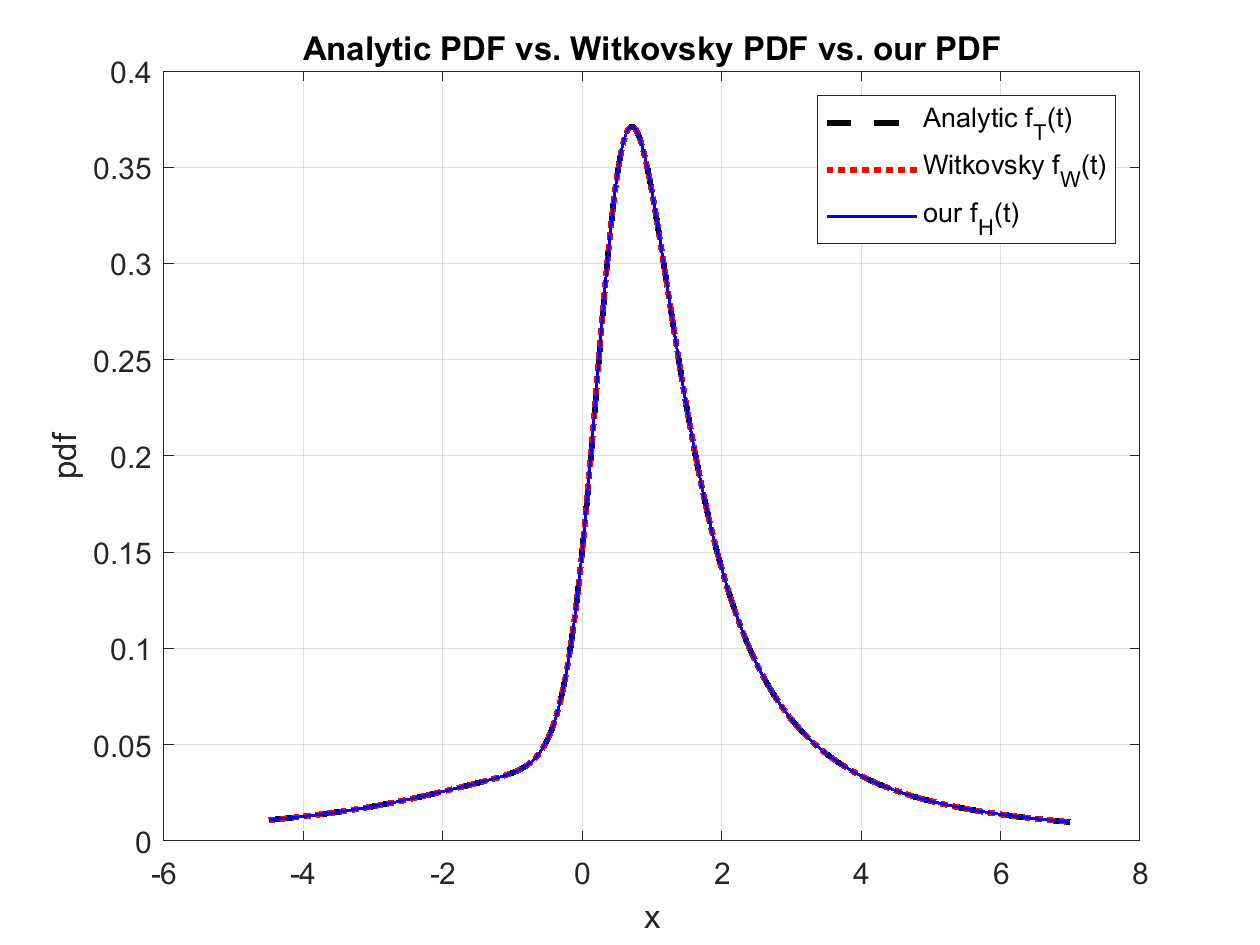

In [4]:
%graphical comparison
figure
plot(x, fT_values, 'k--', 'LineWidth', 2);
hold on;
plot(x, resultW.pdf, 'r:', 'LineWidth', 2);
hold on;
plot(resultH.x, resultH.pdf,'b', 'LineWidth',1)
%xlim([xMin(1) xMax(1)]) % plot in  sigma range
grid on,
title('Analytic PDF vs. Witkovsky PDF vs. our PDF')
xlabel('x')
ylabel('pdf')   
legend('Analytic f_T(t)', 'Witkovsky f_W(t)', 'our f_H(t)');

# EXAMPLE 2: Ratio of Normal and  $\chi^2$ 
For the ratio of independent random variables $T = \frac{X_1}{X_2}$ or $\frac{X_2}{X_1}$ where $X_1$ follows a standard normal distribution and $X_2$ follows a chi-square distribution with 5 degrees of freedom:

**Numerator**: $X_1 \sim N(0, 1)$:
- Characteristic Function (CF): 
$$ \varphi_{X_1}(t) = e^{-\frac{t^2}{2}} $$

**Denominator**: $X_2 \sim \chi^2(5)$:
- Characteristic Function (CF):
$$ \varphi_{X_2}(t) = (1 - 2it)^{-5/2} $$


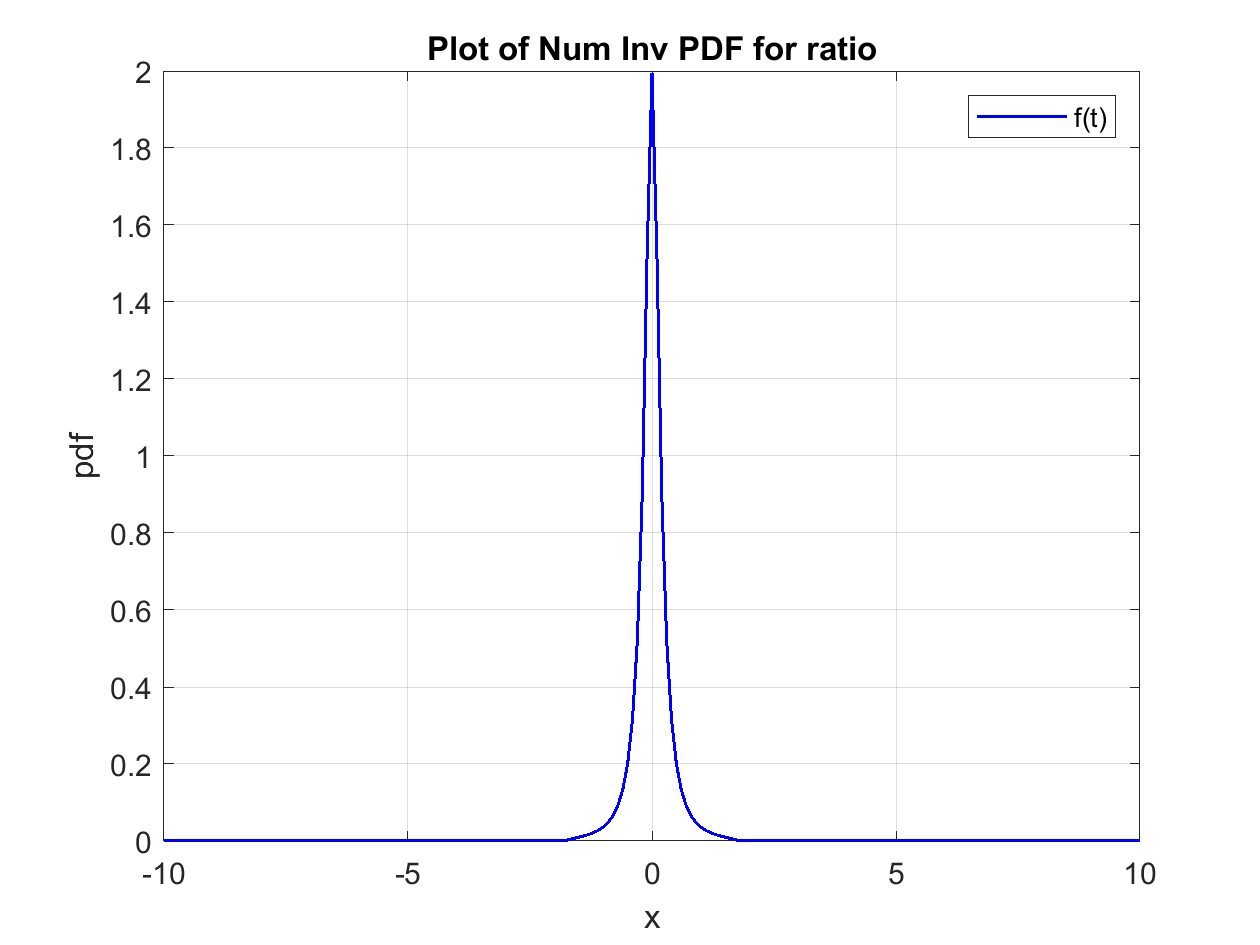

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t)cfS_Gaussian(t)
                 cf2: @(t)(1-2i*t).^(-5/2)
                  xN: 201
                   x: [201x1 double]
                 pdf: [201x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.0552]
                   T: 0.0828
               xMean: [0 5.0000]
                xStd: [1.0000 3.1623]
                xMin: [-10 -13.9737]
                xMax: [10 23.9737]
             options: [1x1 struct]
             runtime: 0.2301
      runtimePerCalc: 0.0011



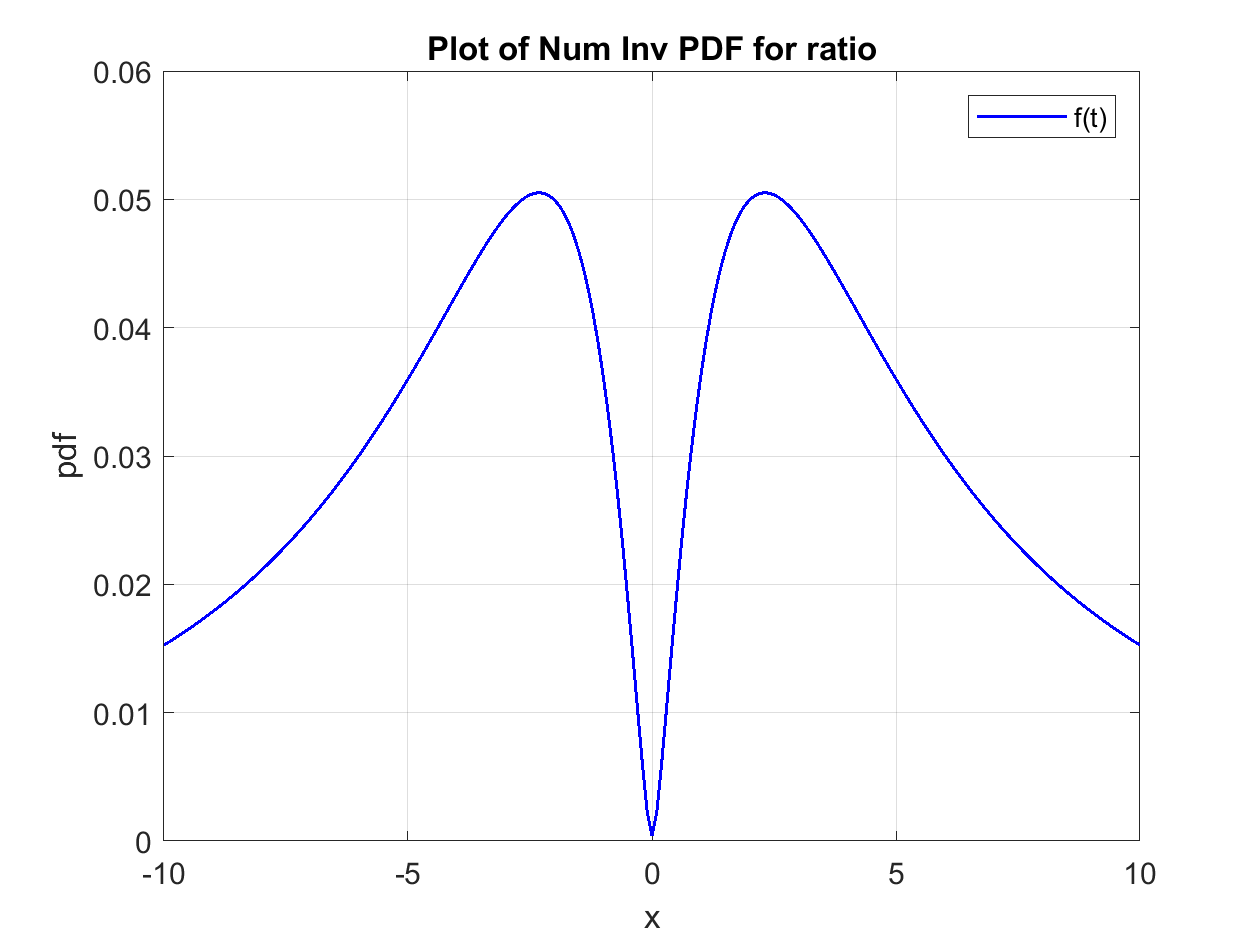

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t)(1-2i*t).^(-5/2)
                 cf2: @(t)cfS_Gaussian(t)
                  xN: 201
                   x: [201x1 double]
                 pdf: [201x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.0552 0.1745]
                   T: 44.7677
               xMean: [5.0000 0]
                xStd: [3.1623 1.0000]
                xMin: [-10 -6.0000]
                xMax: [10 6.0000]
             options: [1x1 struct]
             runtime: 0.5410
      runtimePerCalc: 0.0027



In [5]:
% PDF/CDF of a ratio of independent RVs with standard normal
% distribution and chi-square distribution with 5 degrees of freedom 
cfX1  = @(t) cfS_Gaussian(t);
cfX2  = @(t) (1 - 2i * t).^(-5/2);
% 1000 points in a default six sigma interval for X1
clear options;
options.isPlot = true;
%options.xN = 1000;
x = linspace(-10, 10, 201);

% num inversion of ratio and reciprocal ratio
[resultH1, Rpdf] = cf_Ratio_BK(cfX1, cfX2, x, options);
disp(resultH1)
[resultH2, Rpdf] = cf_Ratio_BK(cfX2, cfX1, x, options);
disp(resultH2)

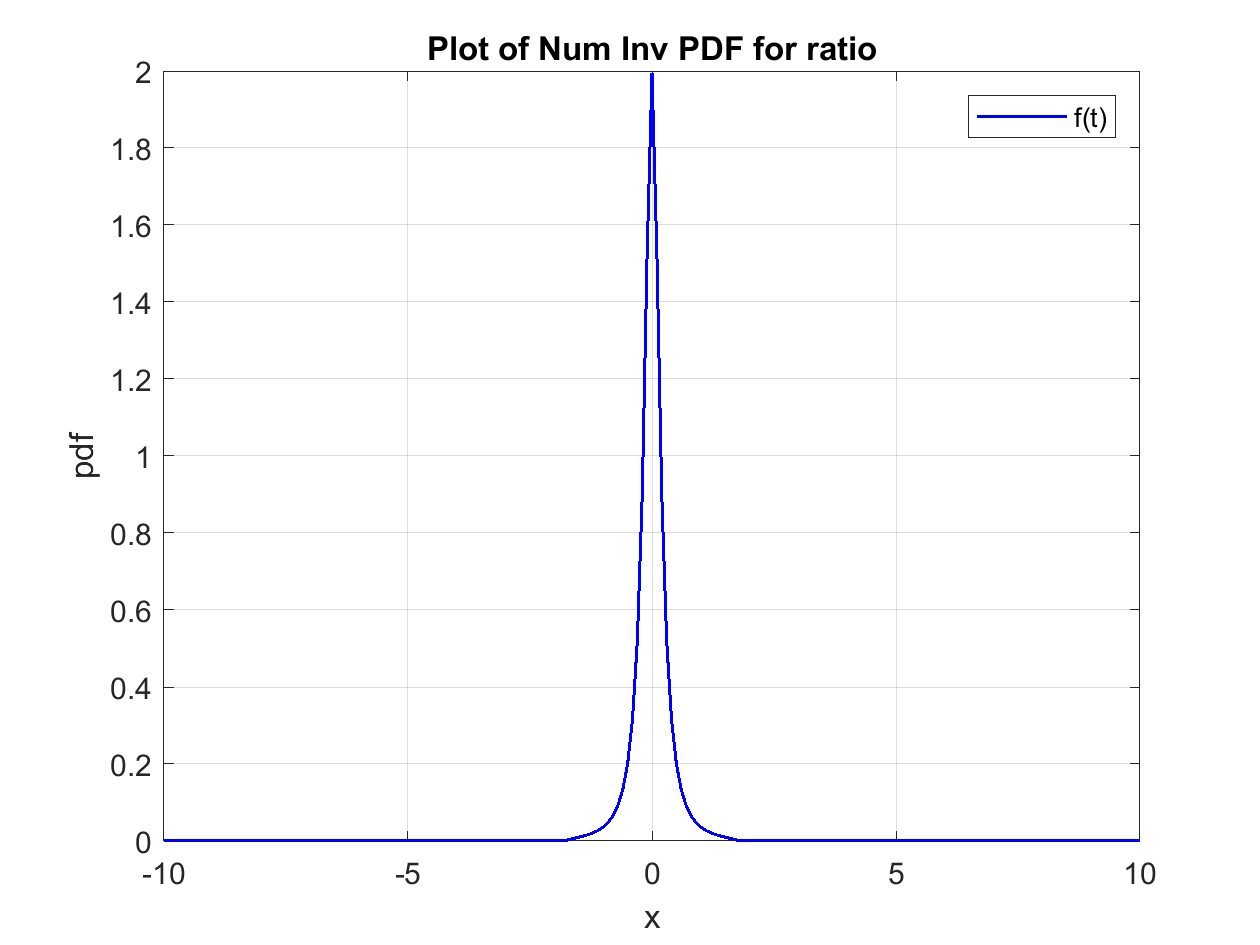

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t)cfS_Gaussian(t)
                 cf2: @(t)(1-2i*t).^(-5/2)
                  xN: 201
                   x: [201x1 double]
                 pdf: [201x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.1745 0.0552]
                   T: 0.0828
               xMean: [0 5.0000]
                xStd: [1.0000 3.1623]
                xMin: [-10 -13.9737]
                xMax: [10 23.9737]
             options: [1x1 struct]
             runtime: 0.0525
      runtimePerCalc: 2.6095e-04



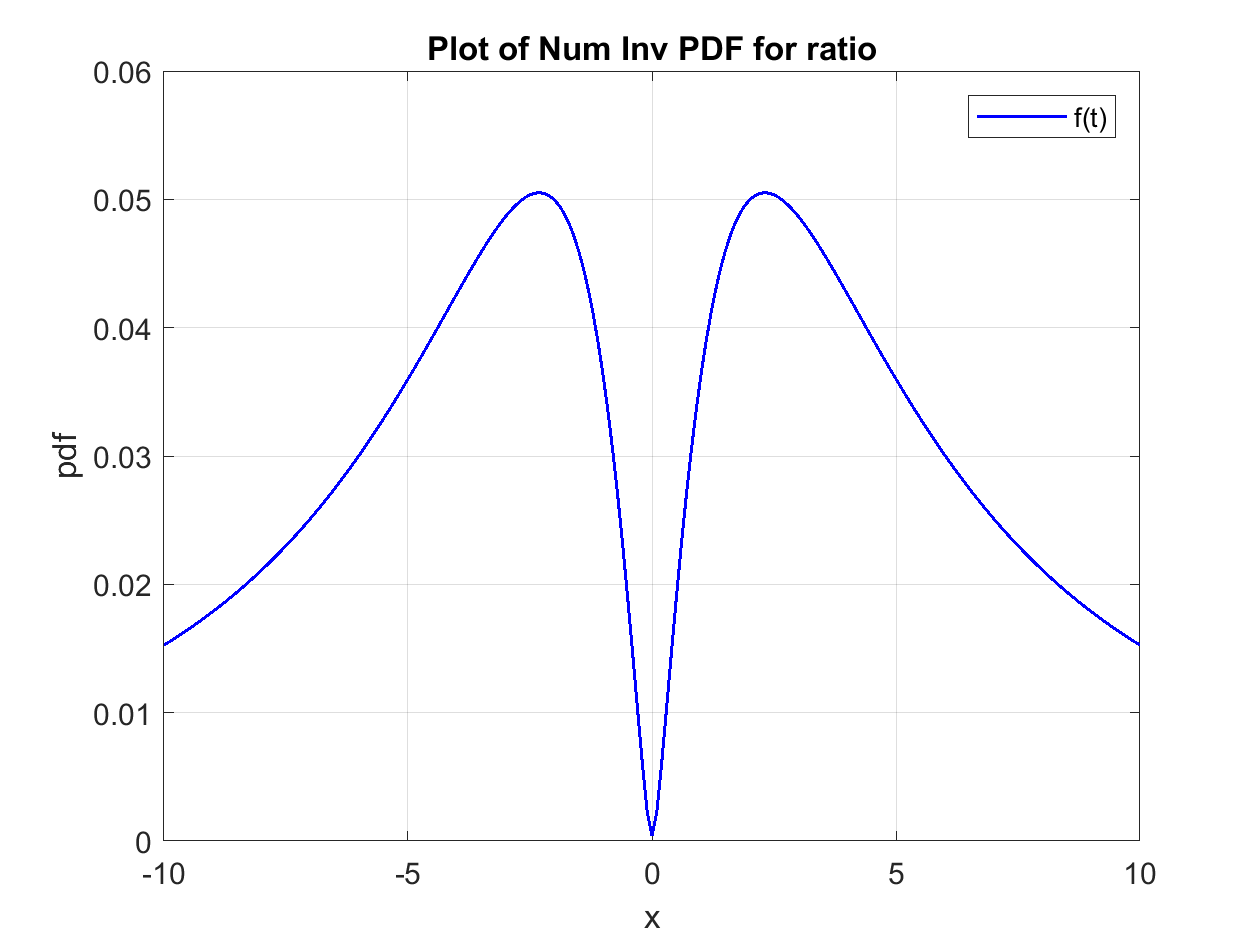

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t)(1-2i*t).^(-5/2)
                 cf2: @(t)cfS_Gaussian(t)
                  xN: 201
                   x: [201x1 double]
                 pdf: [201x1 double]
        SixSigmaRule: 6
                   N: 256
                  dt: [0.0552 0.1745]
                   T: 44.7677
               xMean: [5.0000 0]
                xStd: [3.1623 1.0000]
                xMin: [-10 -6.0000]
                xMax: [10 6.0000]
             options: [1x1 struct]
             runtime: 0.1491
      runtimePerCalc: 7.4178e-04



In [6]:
% using symbolic derivatives of cfs
% Symbolic derivative of characteristic function of X1 ~N(0,1)
cf1_dif  = @(t) -t .* exp(-t.^2 / 2);

% Symbolic derivative of characteristic function of X2 X2 ~ chi^2(5)
cf2_dif = @(t) (5i) ./ (1 - 2i * t).^(7/2); 

% 1000 points in a default six sigma interval for X1
clear options;
options.isPlot = true;
%options.xN = 1000;
x = linspace(-10, 10, 201);

% num inversion of ratio and reciprocal ratio
options.cf2derSymbolic = cf2_dif;
[resultH1, Rpdf] = cf_Ratio_BK(cfX1, cfX2, x, options);
disp(resultH1)
options.cf2derSymbolic = cf1_dif;
[resultH2, Rpdf] = cf_Ratio_BK(cfX2, cfX1, x, options);
disp(resultH2)

### Cross-Check with the Witkovsky approach

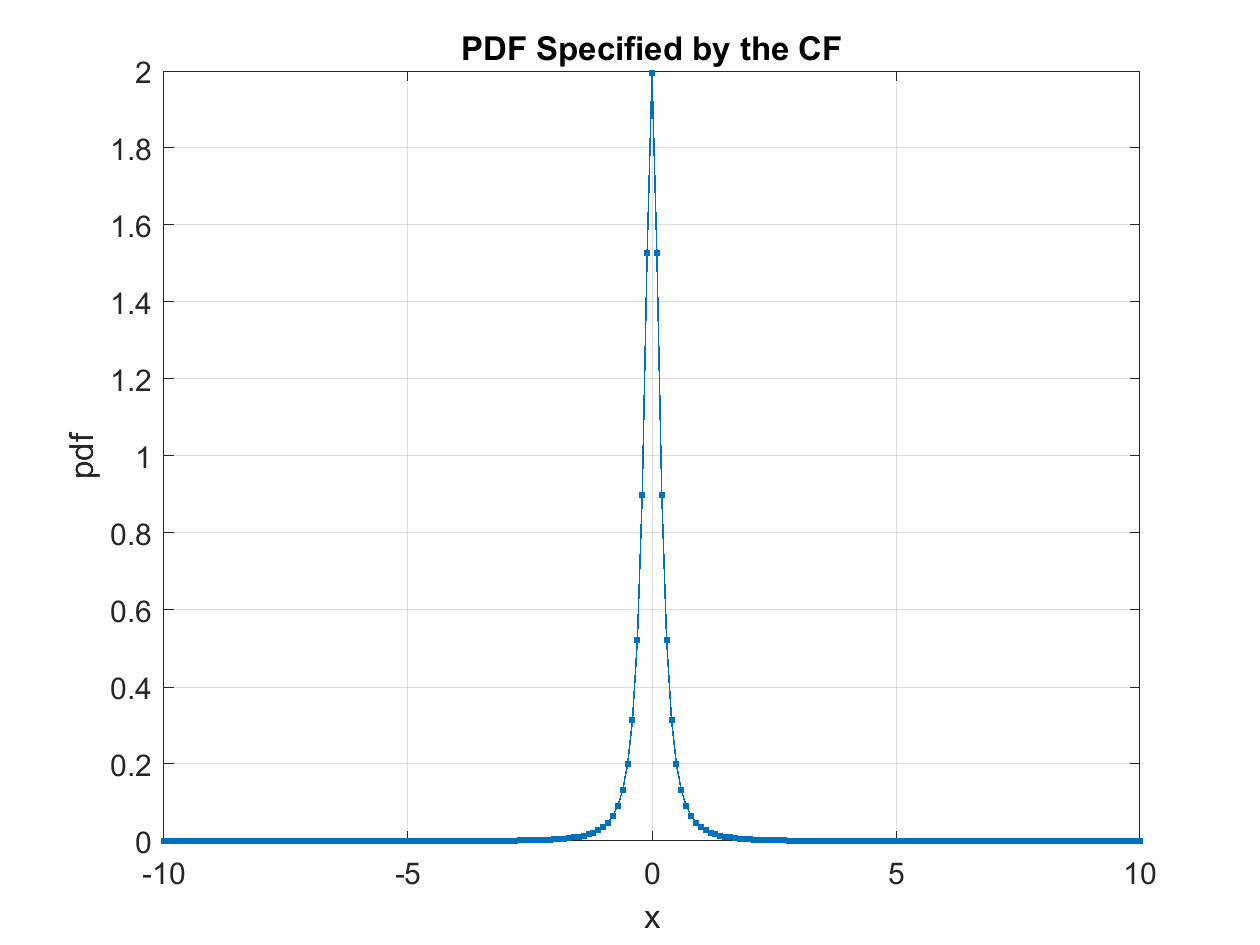

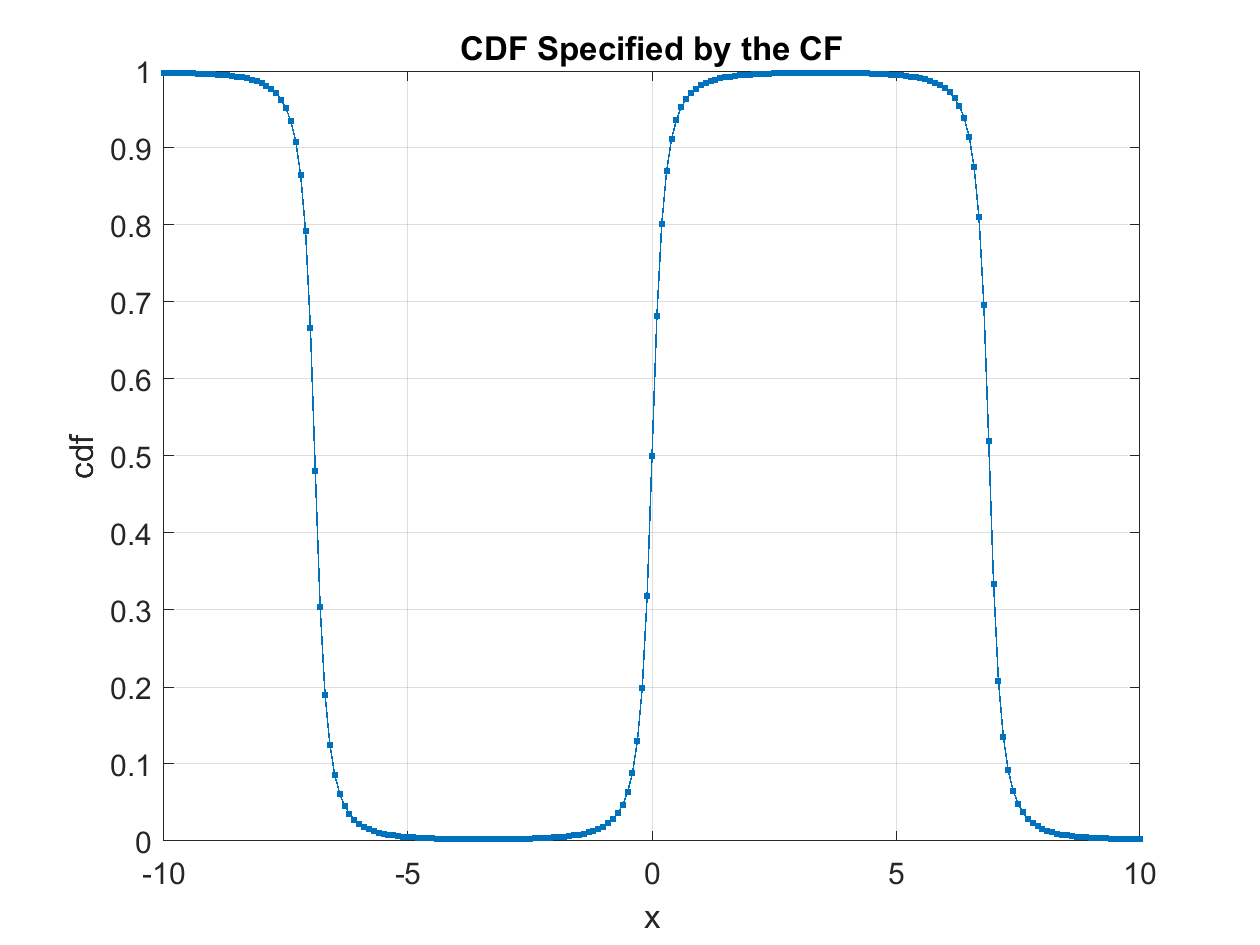

            Description: 'CDF/PDF/QF from the characteristic function CF'
        inversionMethod: 'Gil-Pelaez'
       quadratureMethod: 'Riemann sum quadrature'
                      x: [-10 -9.9000 -9.8000 -9.7000 -9.6000 -9.5000 -9.4000 -9.3000 -9.2000 -9.1000 -9 -8.9000 -8.8000 -8.7000 -8.6000 -8.5000 -8.4000 ... ] (1x201 double)
                    cdf: [0.9976 0.9975 0.9974 0.9973 0.9972 0.9970 0.9968 0.9966 0.9963 0.9960 0.9957 0.9953 0.9948 0.9942 0.9935 0.9926 0.9916 0.9903 ... ] (1x201 double)
                    pdf: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... ] (1x201 double)
                   prob: []
                     qf: []
                     cf: @(t)cf_Ratio(t,cfX1,pdfX2,a,b,tol)
             isCompound: 0
             isCircular: 0
               isInterp: 0
           SixSigmaRule: 6
                      N: 16384
                     dt: 0.9093
                      T: 1.4898

In [7]:
% PDF/CDF of a ratio of independent RVs with standard normal
% distribution and chi-square distribution with 5 degrees of freedom 
cfX1  = @(t) cfS_Gaussian(t);
pdfX2 = @(x) chi2pdf(x,5);
a     = 0;
b     = Inf;
tol   = 1e-12;
cf    = @(t) cf_Ratio(t,cfX1,pdfX2,a,b,tol);
prob  = [];
clear options;
x = linspace(-10, 10, 201);
options.N = 2^14;
resultW1 = cf2DistGP(cf,x,prob,options);
disp(resultW1)

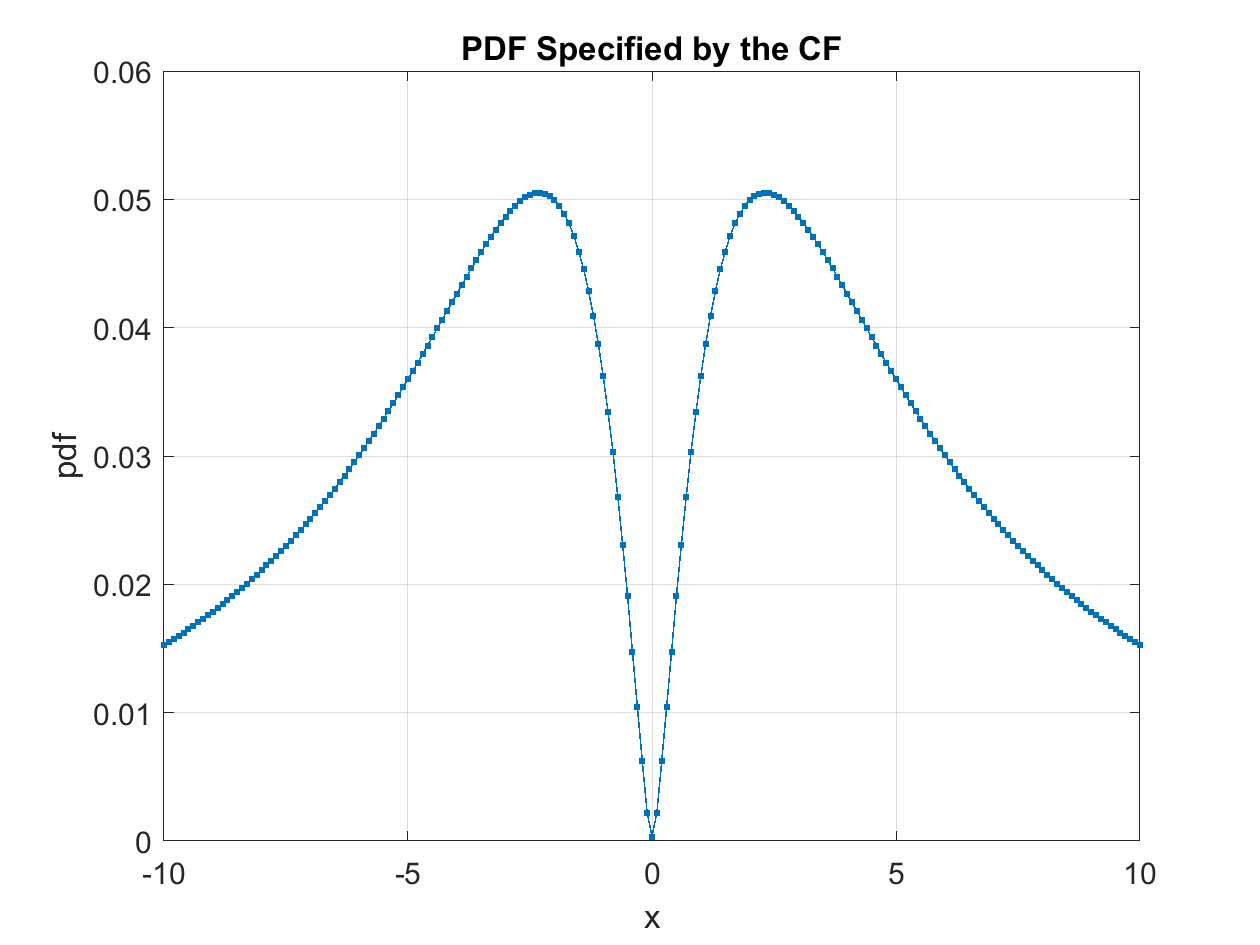

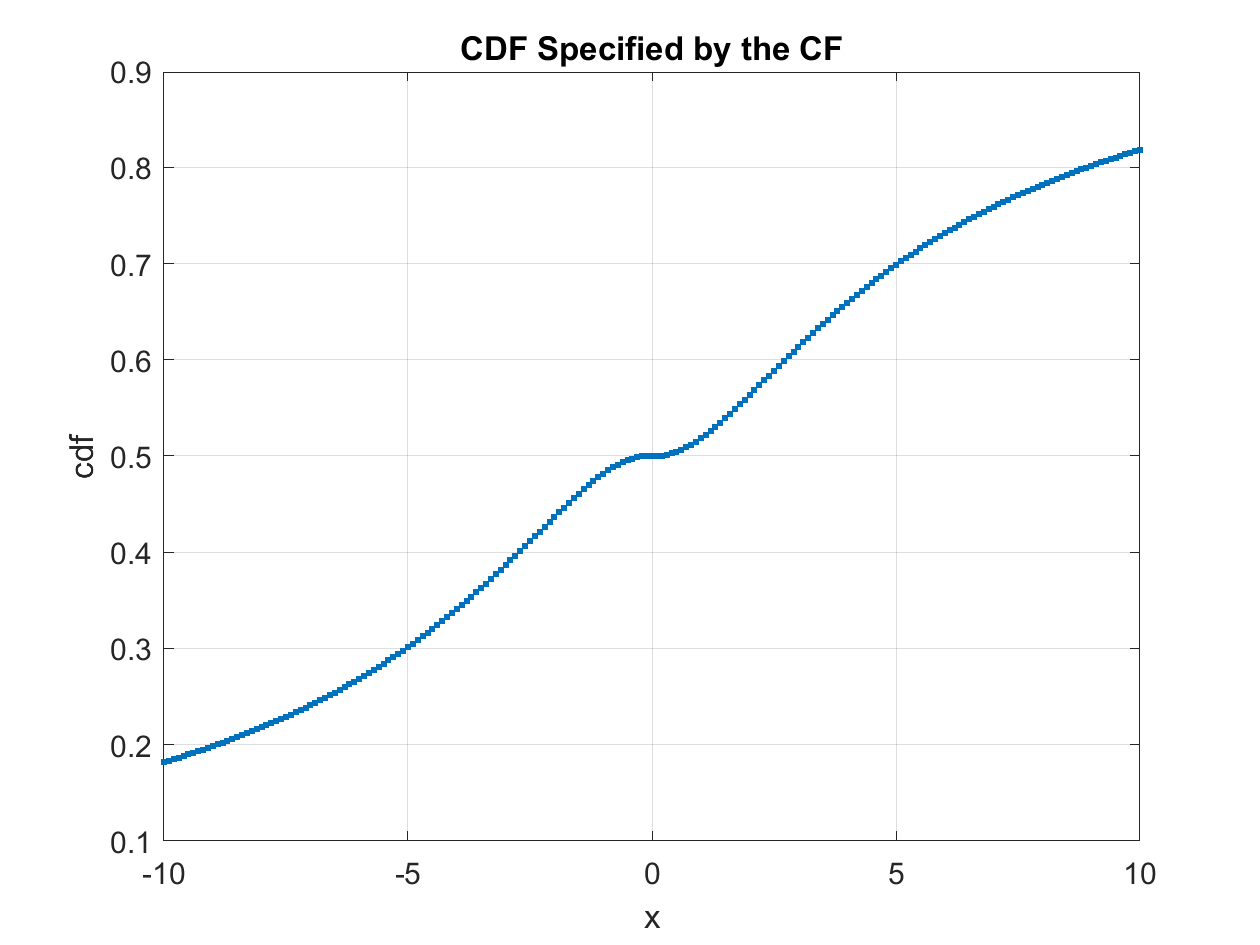

            Description: 'CDF/PDF/QF from the characteristic function CF'
        inversionMethod: 'Gil-Pelaez'
       quadratureMethod: 'Riemann sum quadrature'
                      x: [-10 -9.9000 -9.8000 -9.7000 -9.6000 -9.5000 -9.4000 -9.3000 -9.2000 -9.1000 -9 -8.9000 -8.8000 -8.7000 -8.6000 -8.5000 -8.4000 ... ] (1x201 double)
                    cdf: [0.1820 0.1836 0.1851 0.1867 0.1883 0.1900 0.1916 0.1933 0.1950 0.1968 0.1985 0.2003 0.2022 0.2040 0.2059 0.2079 0.2098 0.2118 ... ] (1x201 double)
                    pdf: [0.0153 0.0155 0.0157 0.0160 0.0162 0.0165 0.0168 0.0170 0.0173 0.0176 0.0179 0.0182 0.0185 0.0188 0.0191 0.0194 0.0197 0.0201 ... ] (1x201 double)
                   prob: []
                     qf: []
                     cf: @(t)cf_Ratio(t,cfX1,pdfX2,a,b,tol)
             isCompound: 0
             isCircular: 0
               isInterp: 0
           SixSigmaRule: 6
                      N: 16384
                     dt: 0.0013
                      T: 21.512

In [8]:
% PDF/CDF of a ratio of independent RVs with chi-squared (df = 5) and
% standard normal distributions 
cfX1  = @(t) cfX_ChiSquare(t,5);
pdfX2 = @(x) normpdf(x);
a     = -inf;
b     = inf;
tol   = 1e-12;
cf    = @(t) cf_Ratio(t,cfX1,pdfX2,a,b,tol);
prob  = [];
clear options;
x = linspace(-10, 10, 201);
options.N = 2^14;
resultW2 = cf2DistGP(cf,x,prob,options);
disp(resultW2)

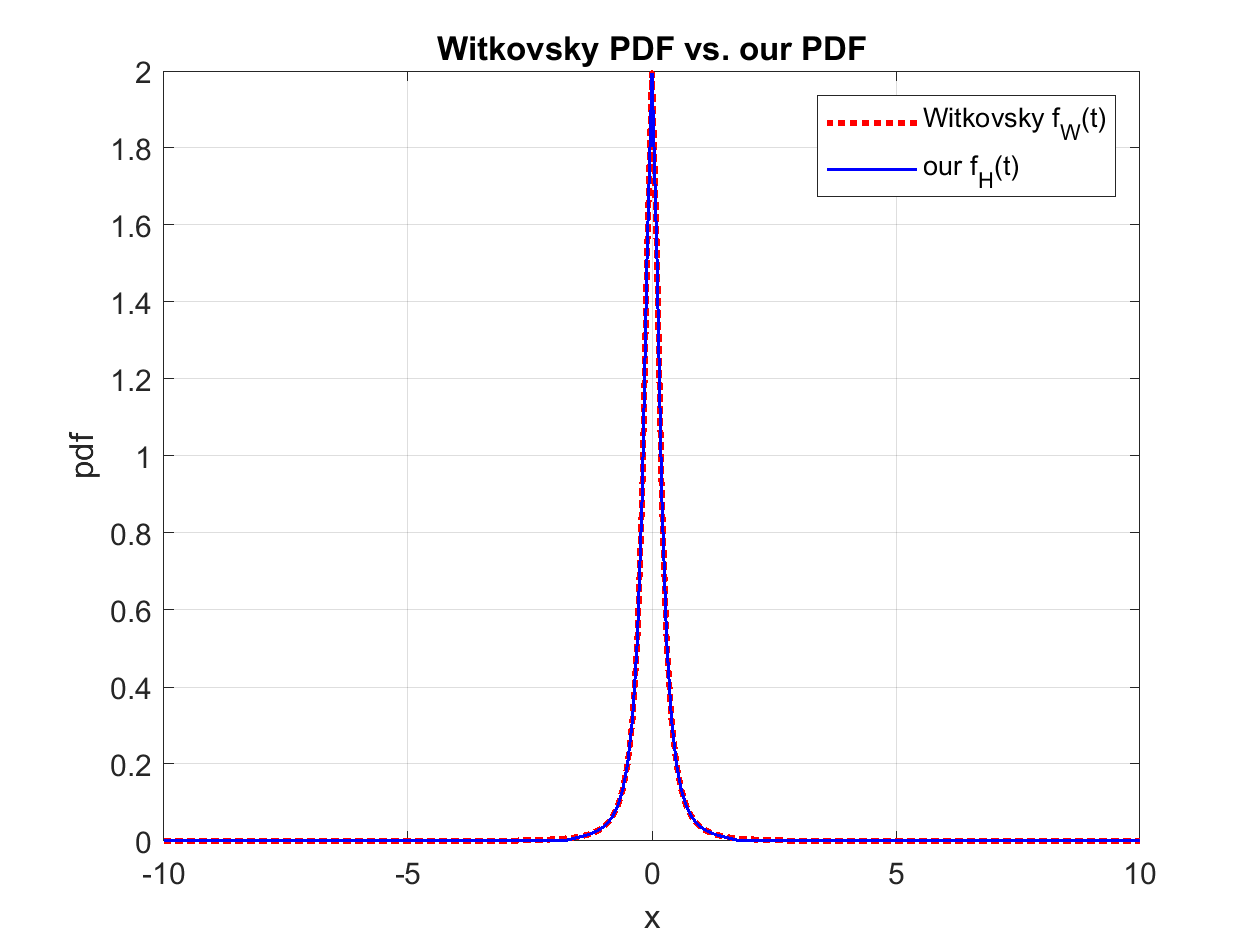

In [9]:
figure
plot(x, resultW1.pdf, 'r:', 'LineWidth', 2);
hold on;
plot(resultH1.x, resultH1.pdf,'b', 'LineWidth',1)
%xlim([xMin(1) xMax(1)]) % plot in  sigma range
grid on,
title('Witkovsky PDF vs. our PDF')
xlabel('x')
ylabel('pdf')   
legend('Witkovsky f_W(t)', 'our f_H(t)');

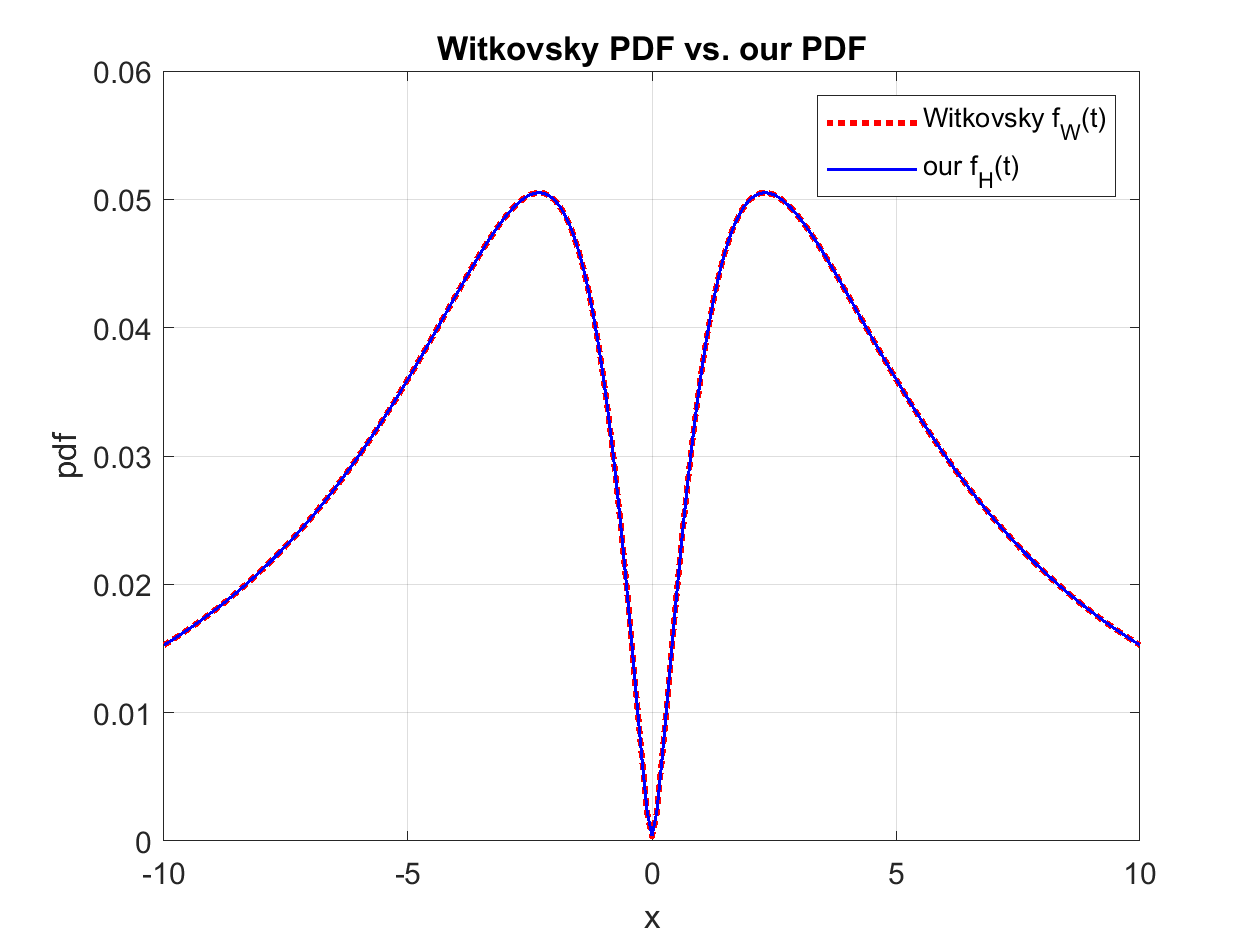

In [10]:
figure
plot(x, resultW2.pdf, 'r:', 'LineWidth', 2);
hold on;
plot(resultH2.x, resultH2.pdf,'b', 'LineWidth',1)
%xlim([xMin(1) xMax(1)]) % plot in  sigma range
grid on,
title('Witkovsky PDF vs. our PDF')
xlabel('x')
ylabel('pdf')   
legend('Witkovsky f_W(t)', 'our f_H(t)');

# EXAMPLE 3: Ratio of Rectangular and Triangular

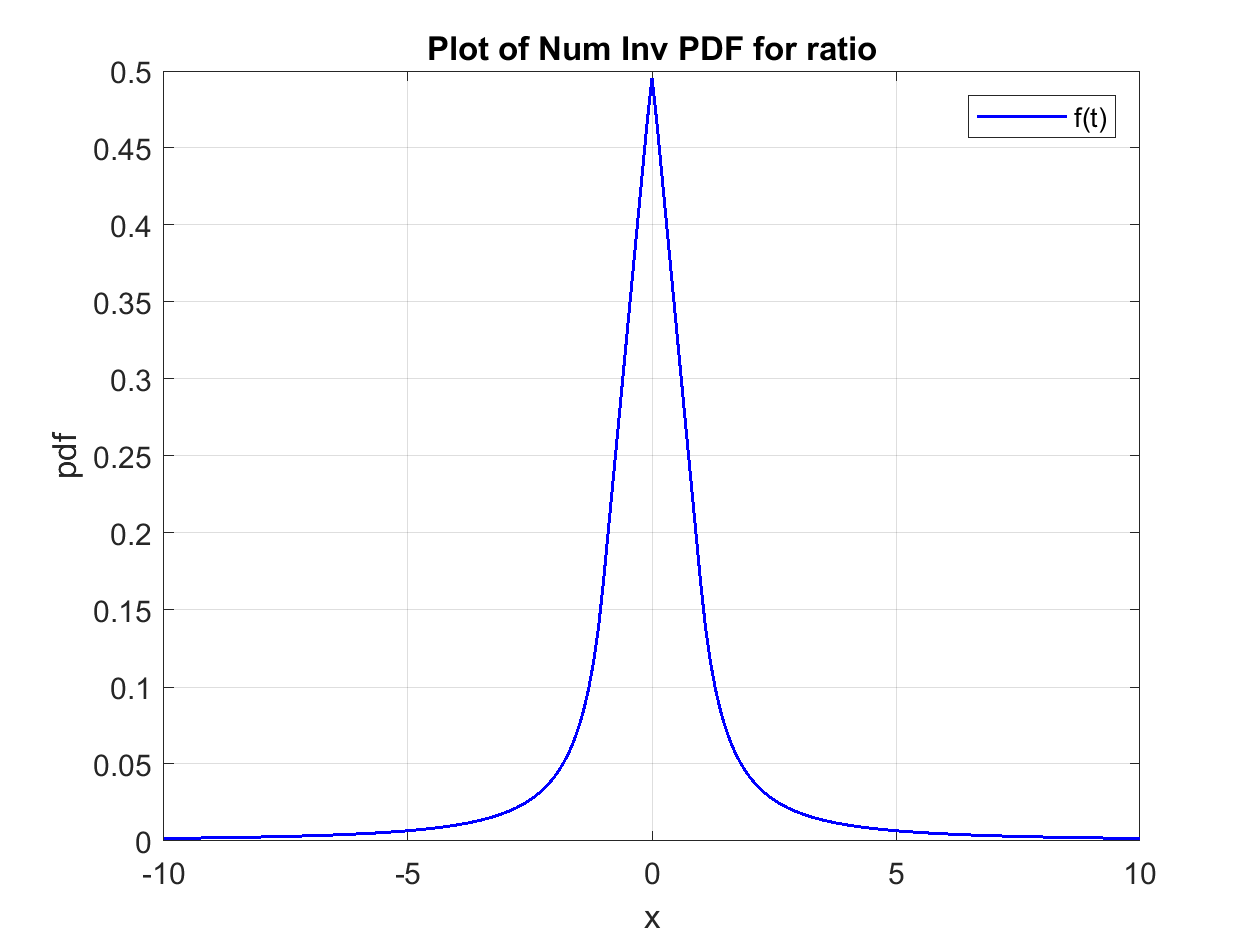

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t)cfS_Triangular(t)
                 cf2: @(t)cf_RectangularSymmetric(t)
                  xN: 201
                   x: [201x1 double]
                 pdf: [201x1 double]
        SixSigmaRule: 6
                   N: 512
                  dt: [0.1323 0.3023]
                   T: 154.9287
               xMean: [0 0]
                xStd: [1.3193 0.5774]
                xMin: [-10 -3.4641]
                xMax: [10 3.4641]
             options: [1x1 struct]
             runtime: 2.3686
      runtimePerCalc: 0.0118



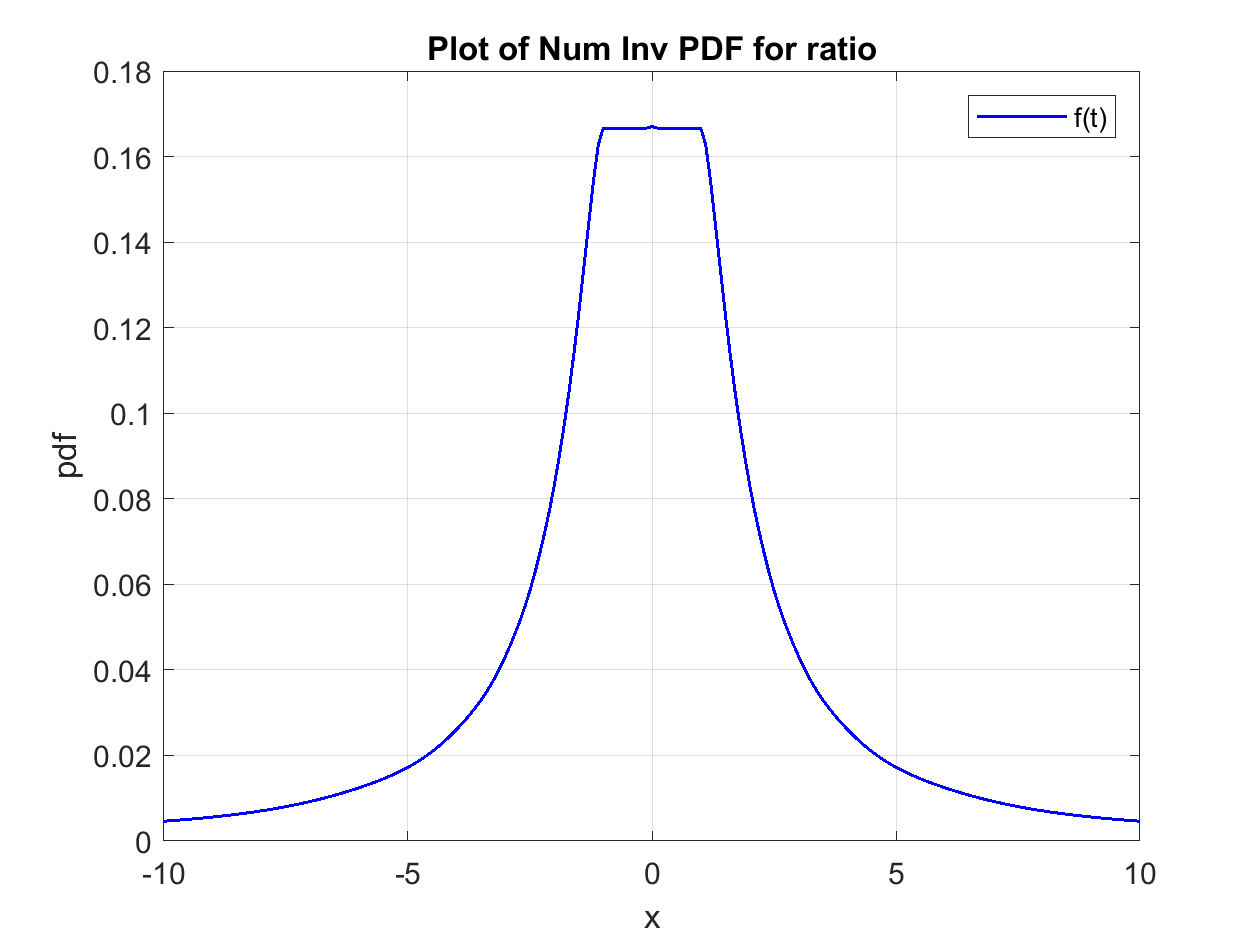

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Trapezoidal 2D quadrature'
                 cf1: @(t)cf_RectangularSymmetric(t)
                 cf2: @(t)cfS_Triangular(t)
                  xN: 201
                   x: [201x1 double]
                 pdf: [201x1 double]
        SixSigmaRule: 6
                   N: 512
                  dt: [0.3023 0.1323]
                   T: 67.8018
               xMean: [0 0]
                xStd: [0.5774 1.3193]
                xMin: [-10 -7.9156]
                xMax: [10 7.9156]
             options: [1x1 struct]
             runtime: 2.3081
      runtimePerCalc: 0.0115



In [37]:
%  PDF of a ratio of independent RVs with symmetric standard
%  triangular and rectangular distributions
cfX1  = @(t) cfS_Triangular(t);
cfX2  = @(t) cf_RectangularSymmetric(t);
% 1000 points in a default six sigma interval for X1
clear options;
options.isPlot = true;
options.N = 2^9;
x = linspace(-10, 10, 201);

% num inversion of ratio and reciprocal ratio
[resultH1, Rpdf] = cf_Ratio_BK(cfX1, cfX2, x, options);
disp(resultH1)
[resultH2, Rpdf] = cf_Ratio_BK(cfX2, cfX1, x, options);
disp(resultH2)

### Cross-Check with the Witkovsky approach

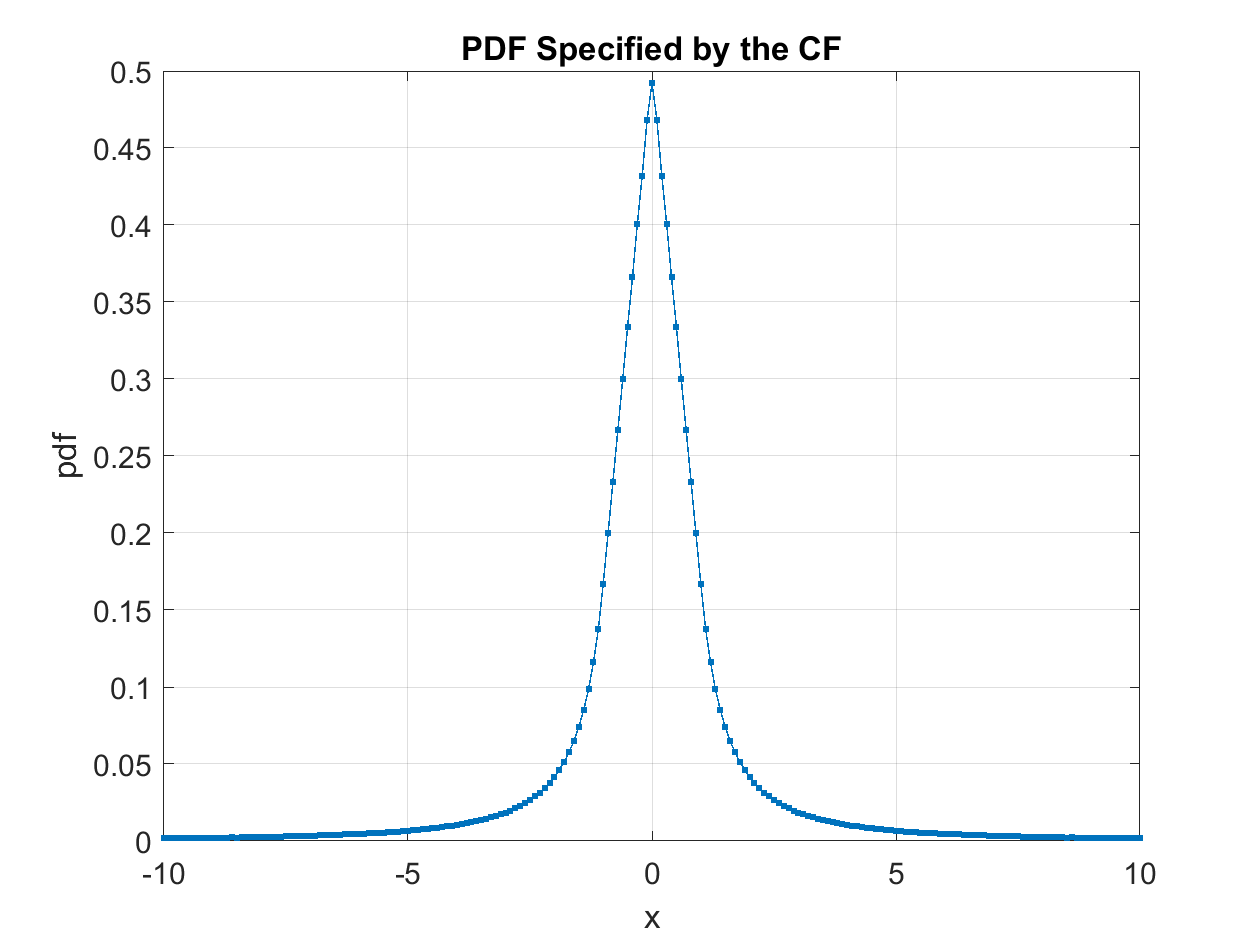

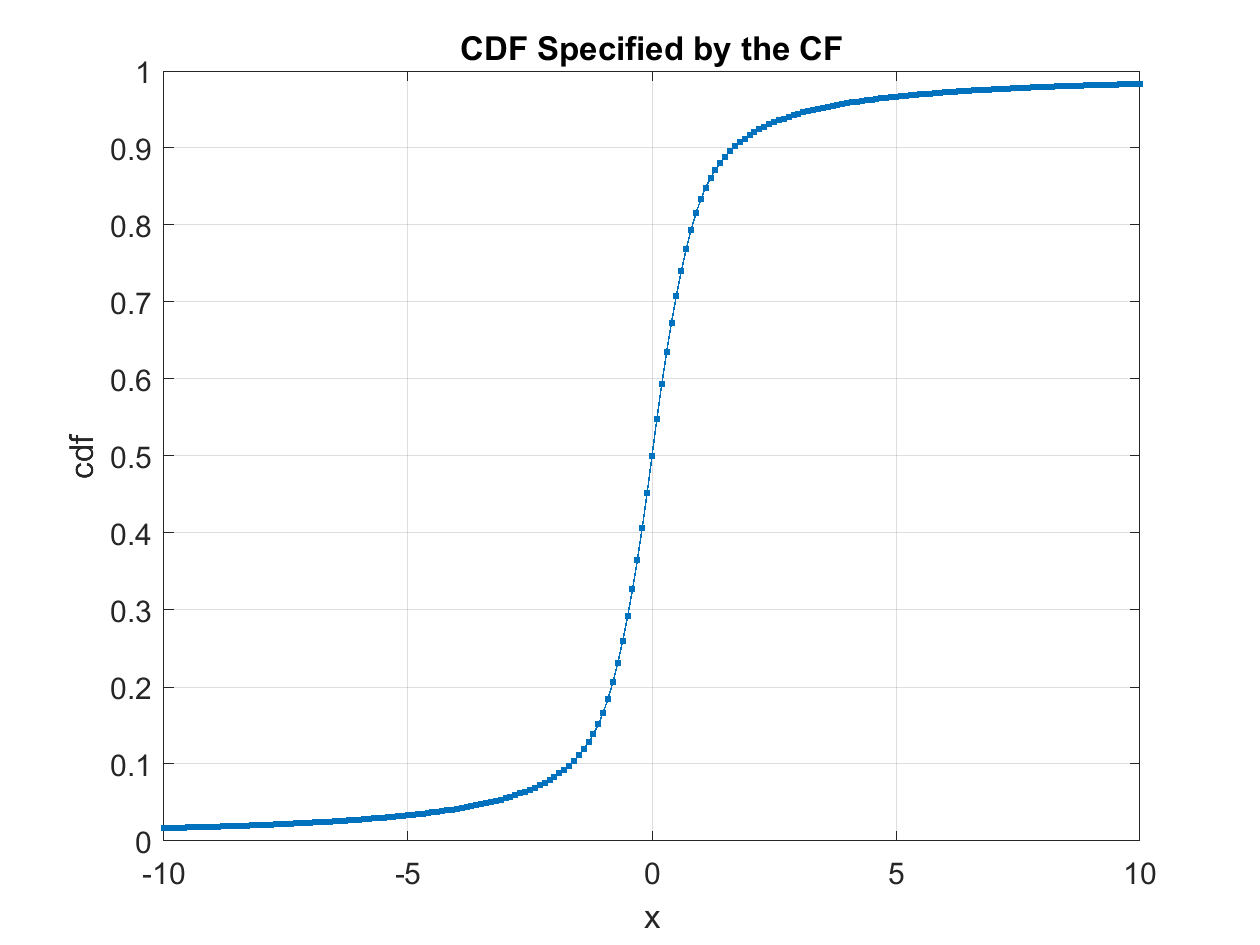

In [38]:
% PDF/CDF of a ratio of independent RVs with symmetric standard
% triangular and rectangular distributions
cfX1  = @(t) cfS_Triangular(t);
pdfX2 = @(x) 0.5;
a     = -1;
b     = 1;
tol   = 1e-4;
cf    = @(t) cf_Ratio(t,cfX1,pdfX2,a,b,tol);
x     = linspace(-10,10,201);
prob  = [];
clear options;
options.N = 2^10;
resultW1 = cf2DistGP(cf,x,prob,options);

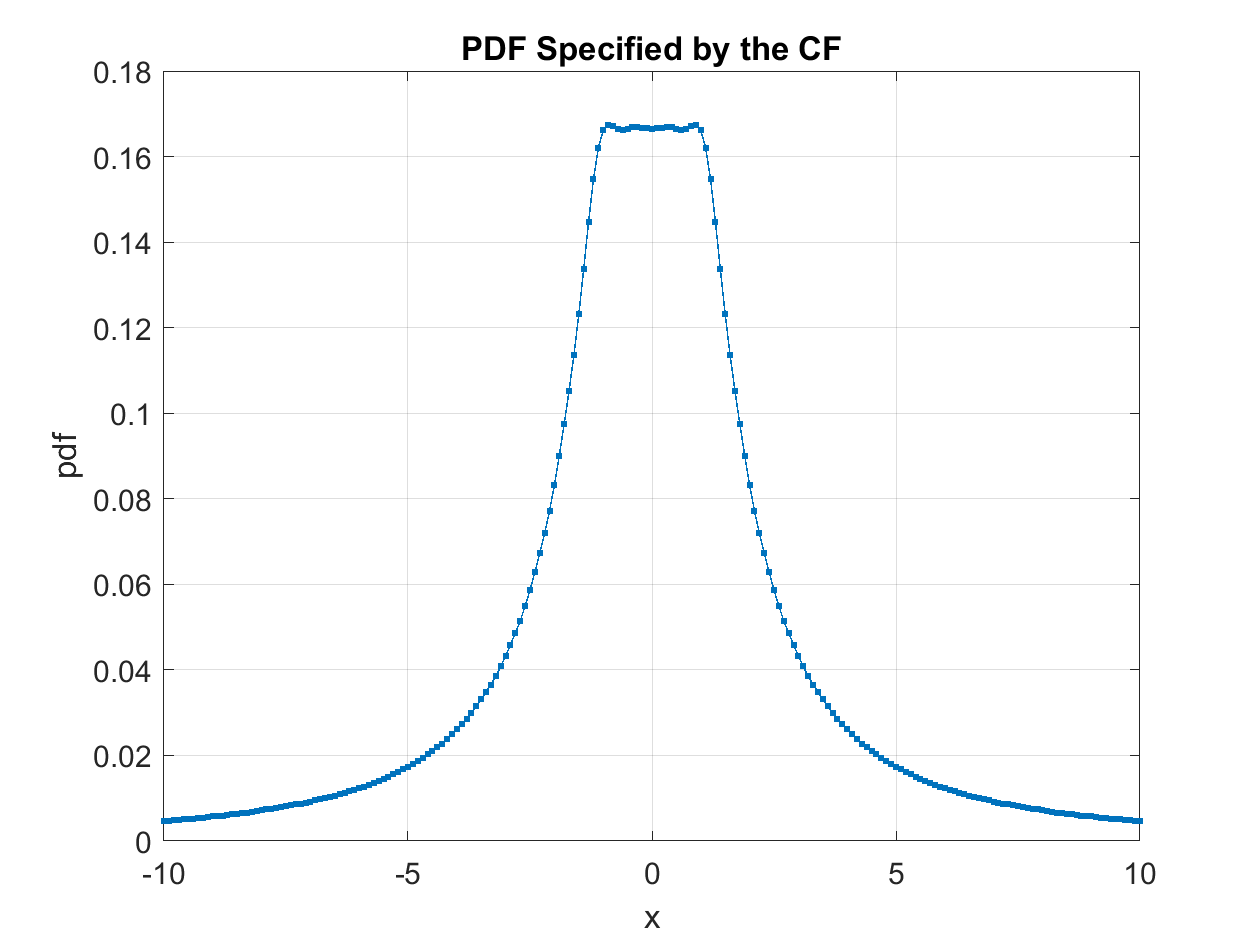

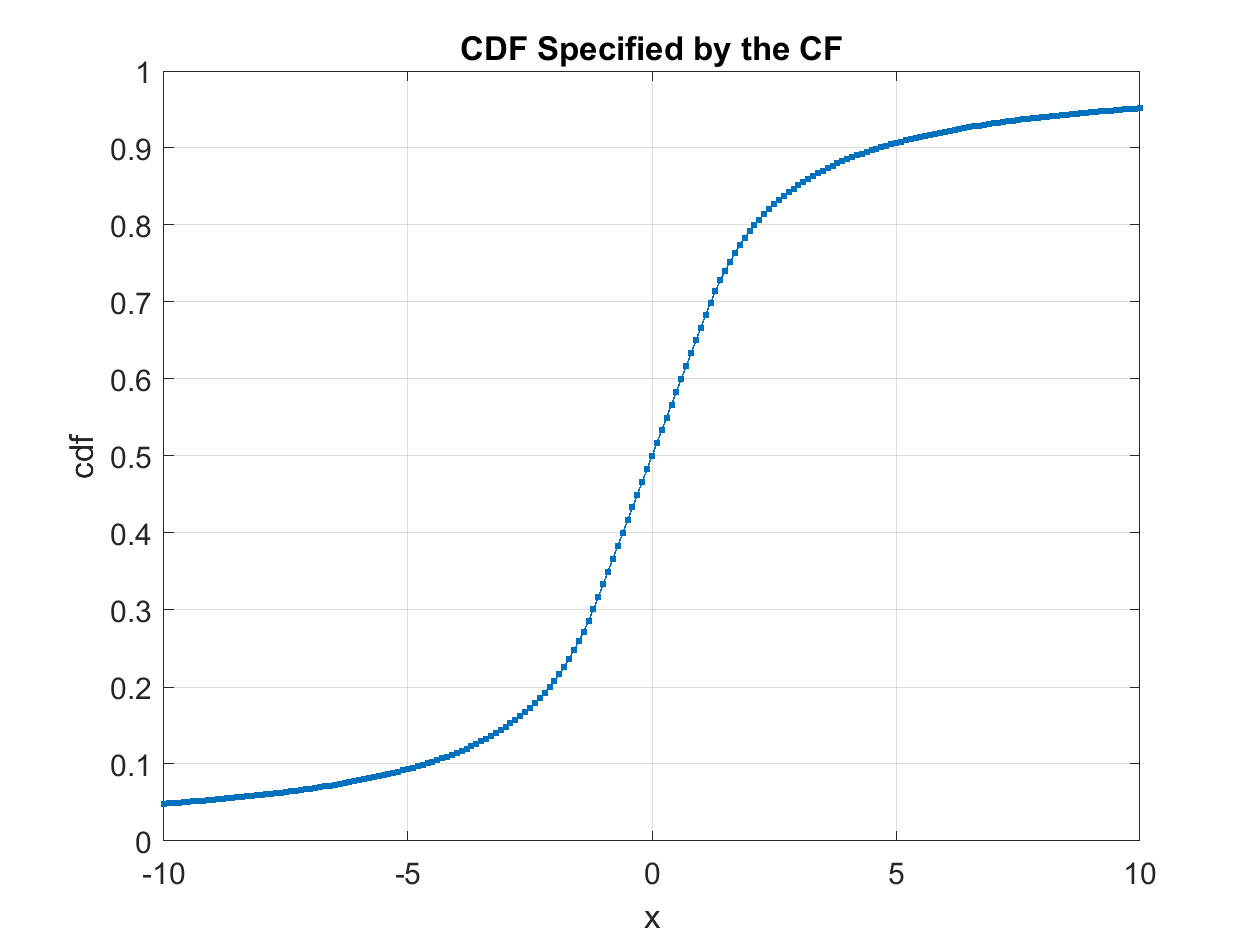

In [41]:
% PDF/CDF of a ratio of independent RVs with symmetric standard
% triangular and rectangular distributions
cfX1  = @(t) cf_RectangularSymmetric(t);
pdfX2 = @(x) (1 - abs(x));
a     = -1;
b     = 1;
tol   = 1e-4;
cf    = @(t) cf_Ratio(t,cfX1,pdfX2,a,b,tol);
x     = linspace(-10,10,201);
prob  = [];
clear options;
options.N = 2^12;
resultW2 = cf2DistGP(cf,x,prob,options);

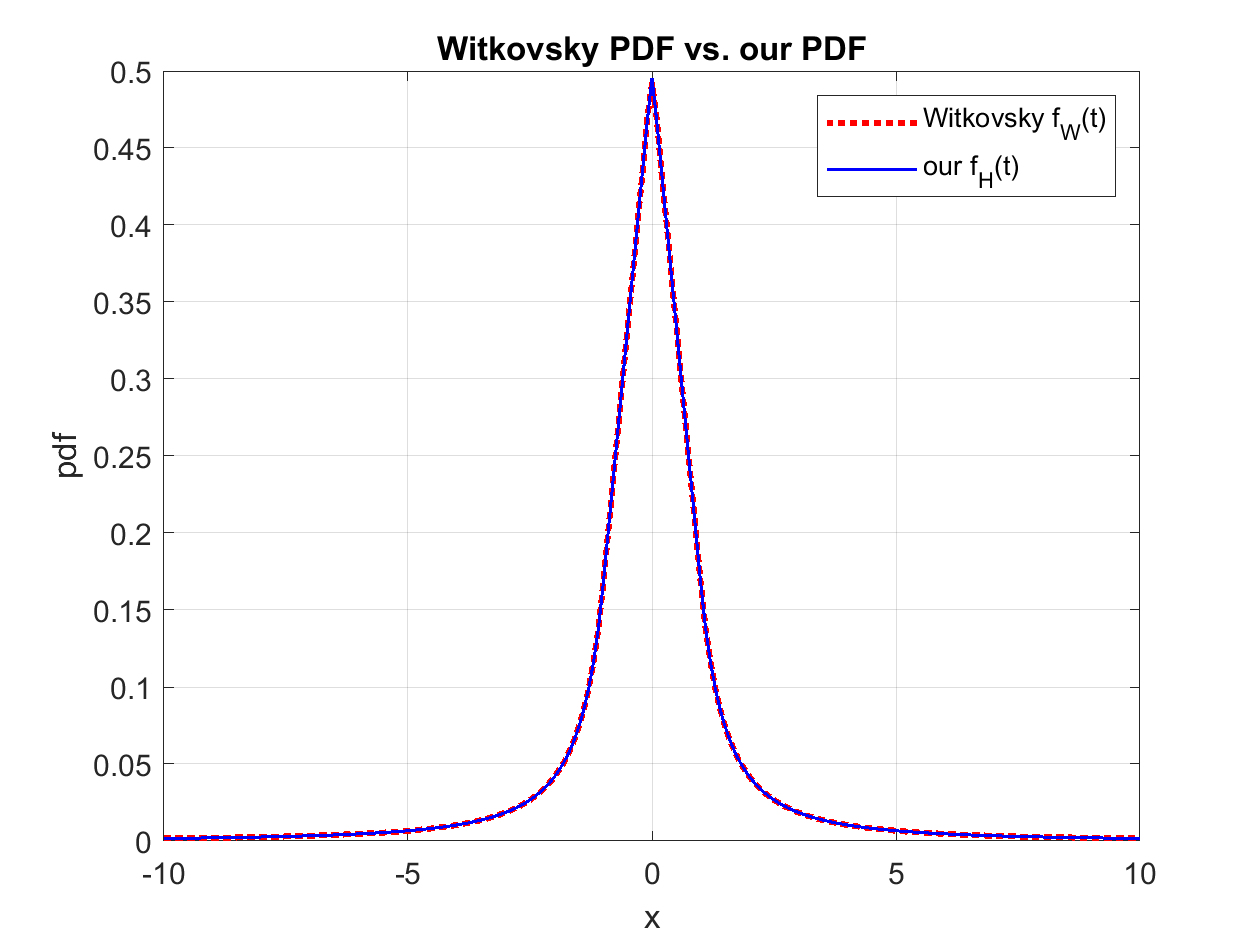

In [42]:
figure
plot(x, resultW1.pdf, 'r:', 'LineWidth', 2);
hold on;
plot(resultH1.x, resultH1.pdf,'b', 'LineWidth',1)
%xlim([xMin(1) xMax(1)]) % plot in  sigma range
grid on,
title('Witkovsky PDF vs. our PDF')
xlabel('x')
ylabel('pdf')   
legend('Witkovsky f_W(t)', 'our f_H(t)');

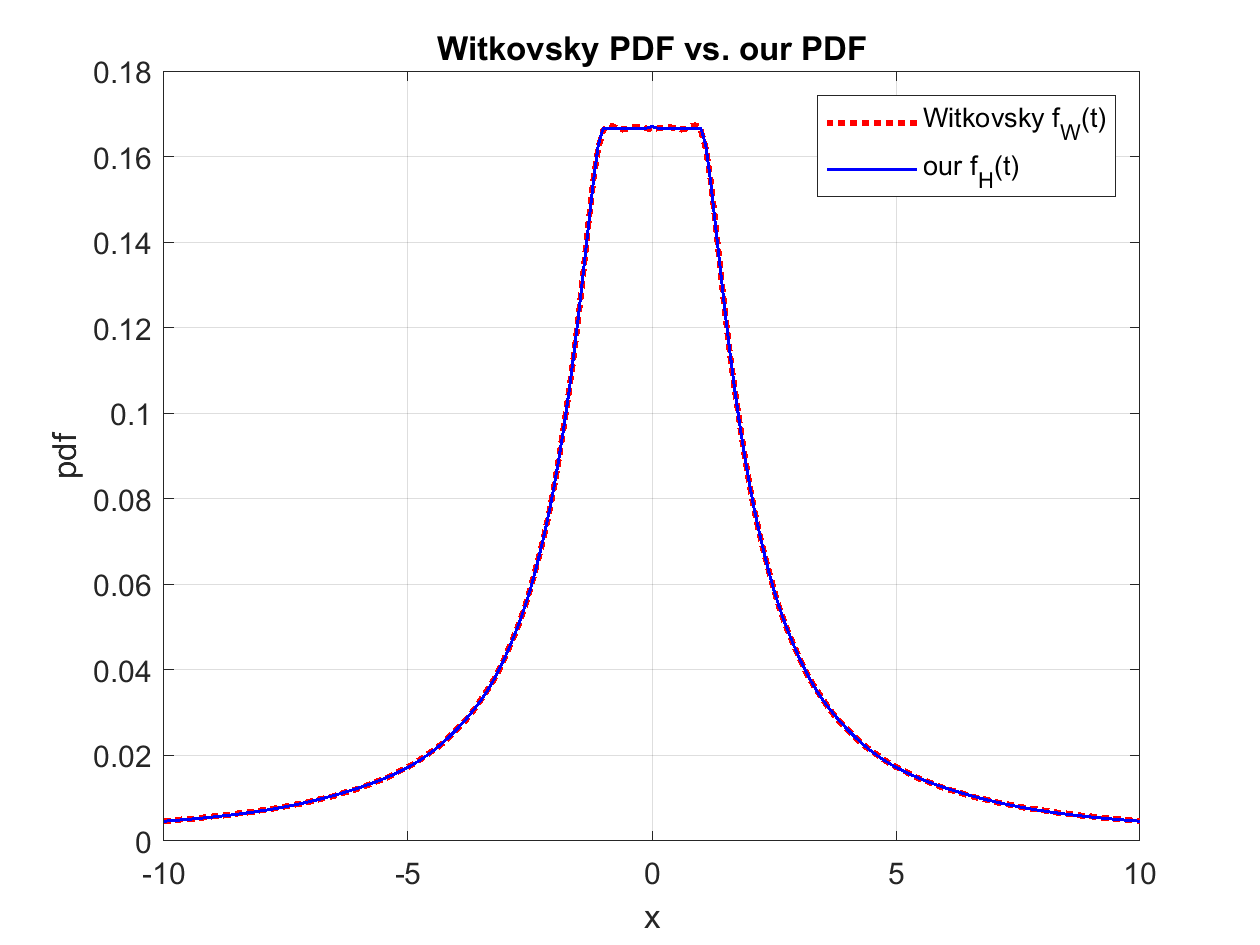

In [43]:
figure
plot(x, resultW2.pdf, 'r:', 'LineWidth', 2);
hold on;
plot(resultH2.x, resultH2.pdf,'b', 'LineWidth',1)
%xlim([xMin(1) xMax(1)]) % plot in  sigma range
grid on,
title('Witkovsky PDF vs. our PDF')
xlabel('x')
ylabel('pdf')   
legend('Witkovsky f_W(t)', 'our f_H(t)');